<a href="https://colab.research.google.com/github/idubey-code/cs480student/blob/main/CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

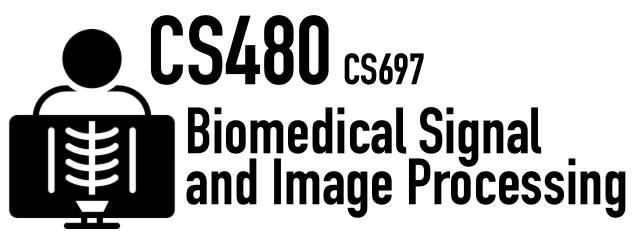
#Assignment 7

In [1]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

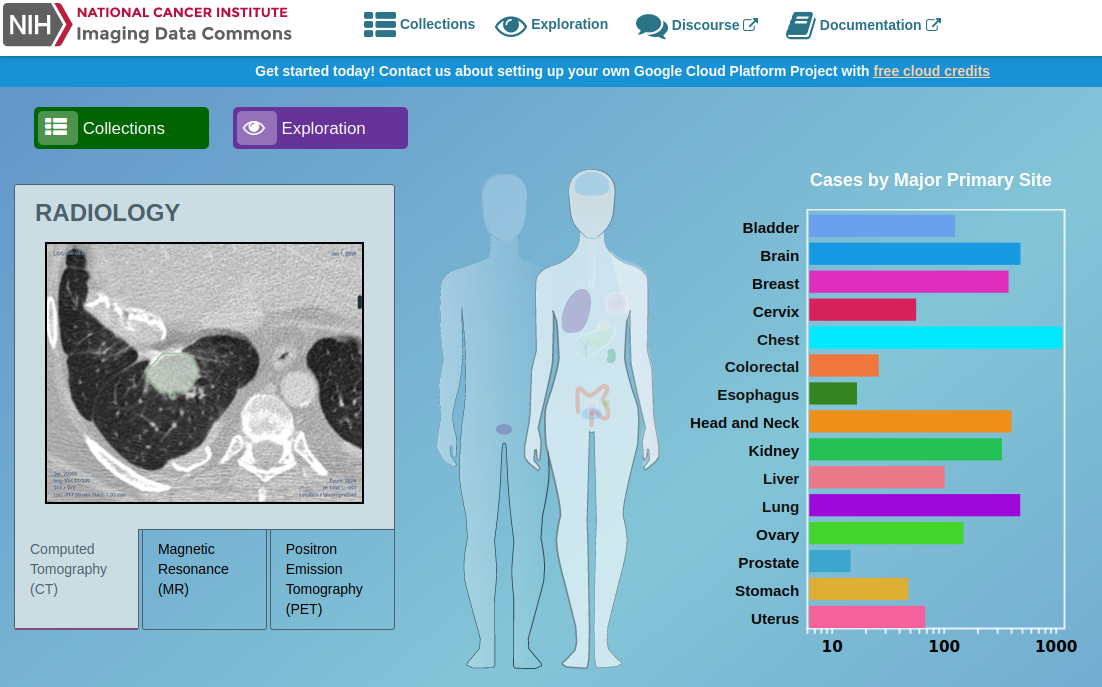

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [2]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [3]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

TODO: Add screenshot

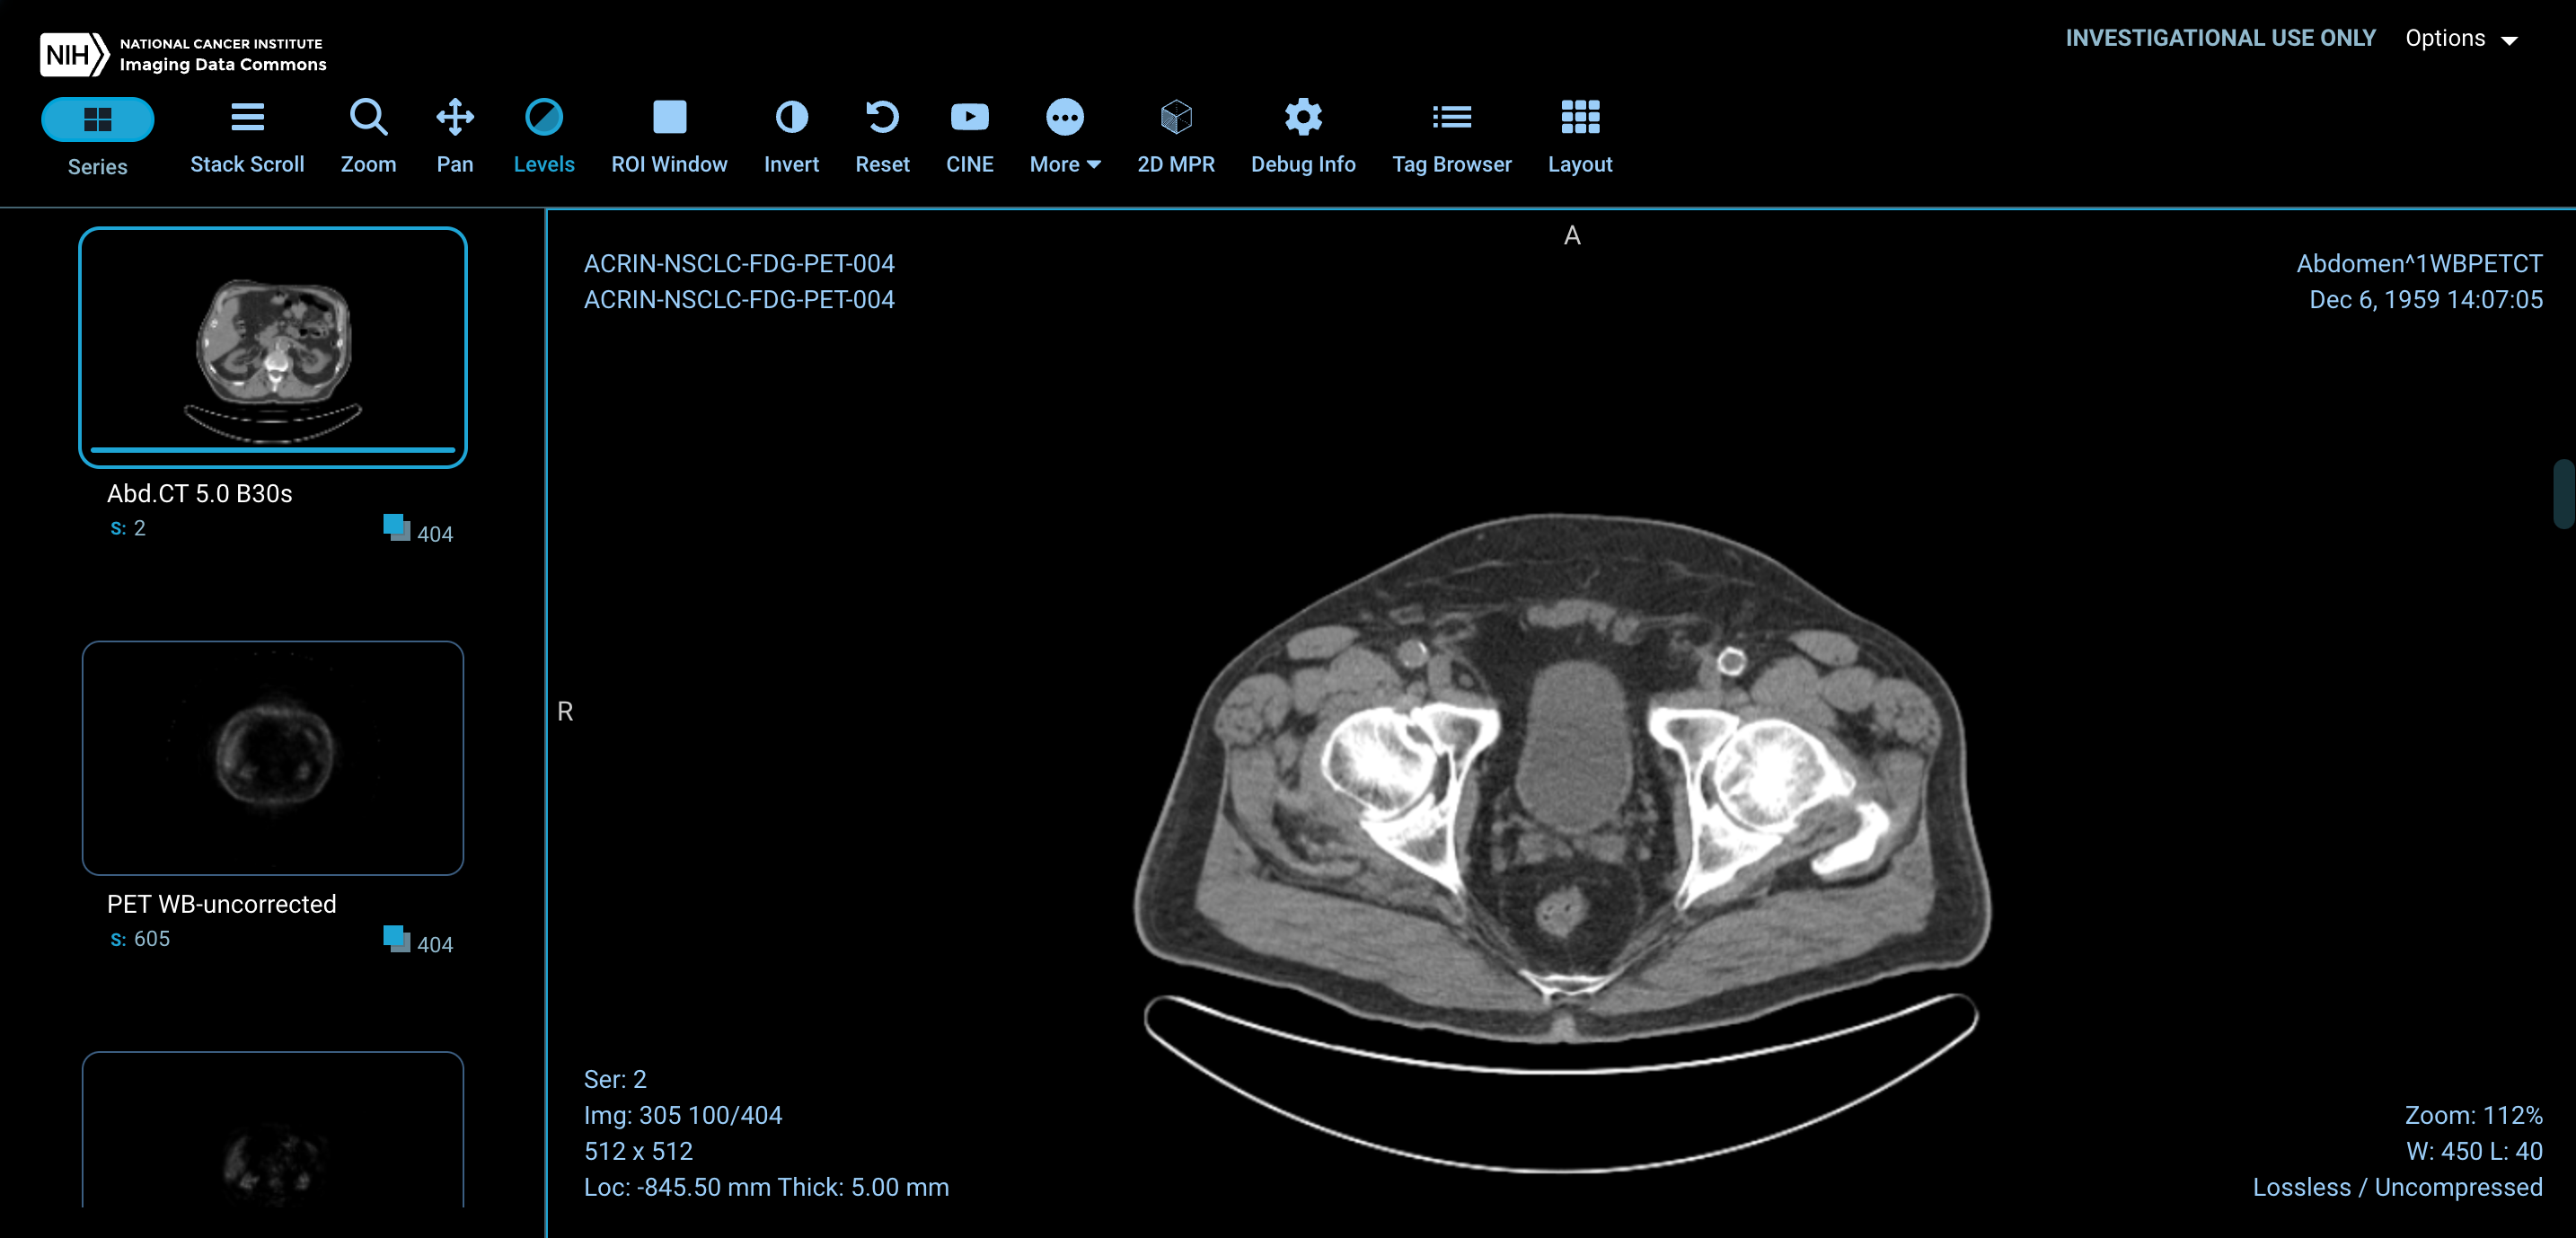

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [4]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [5]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [6]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [7]:
# TODO: Paste a screenshot showing the 2-column layout below.

TODO: Add screenshot

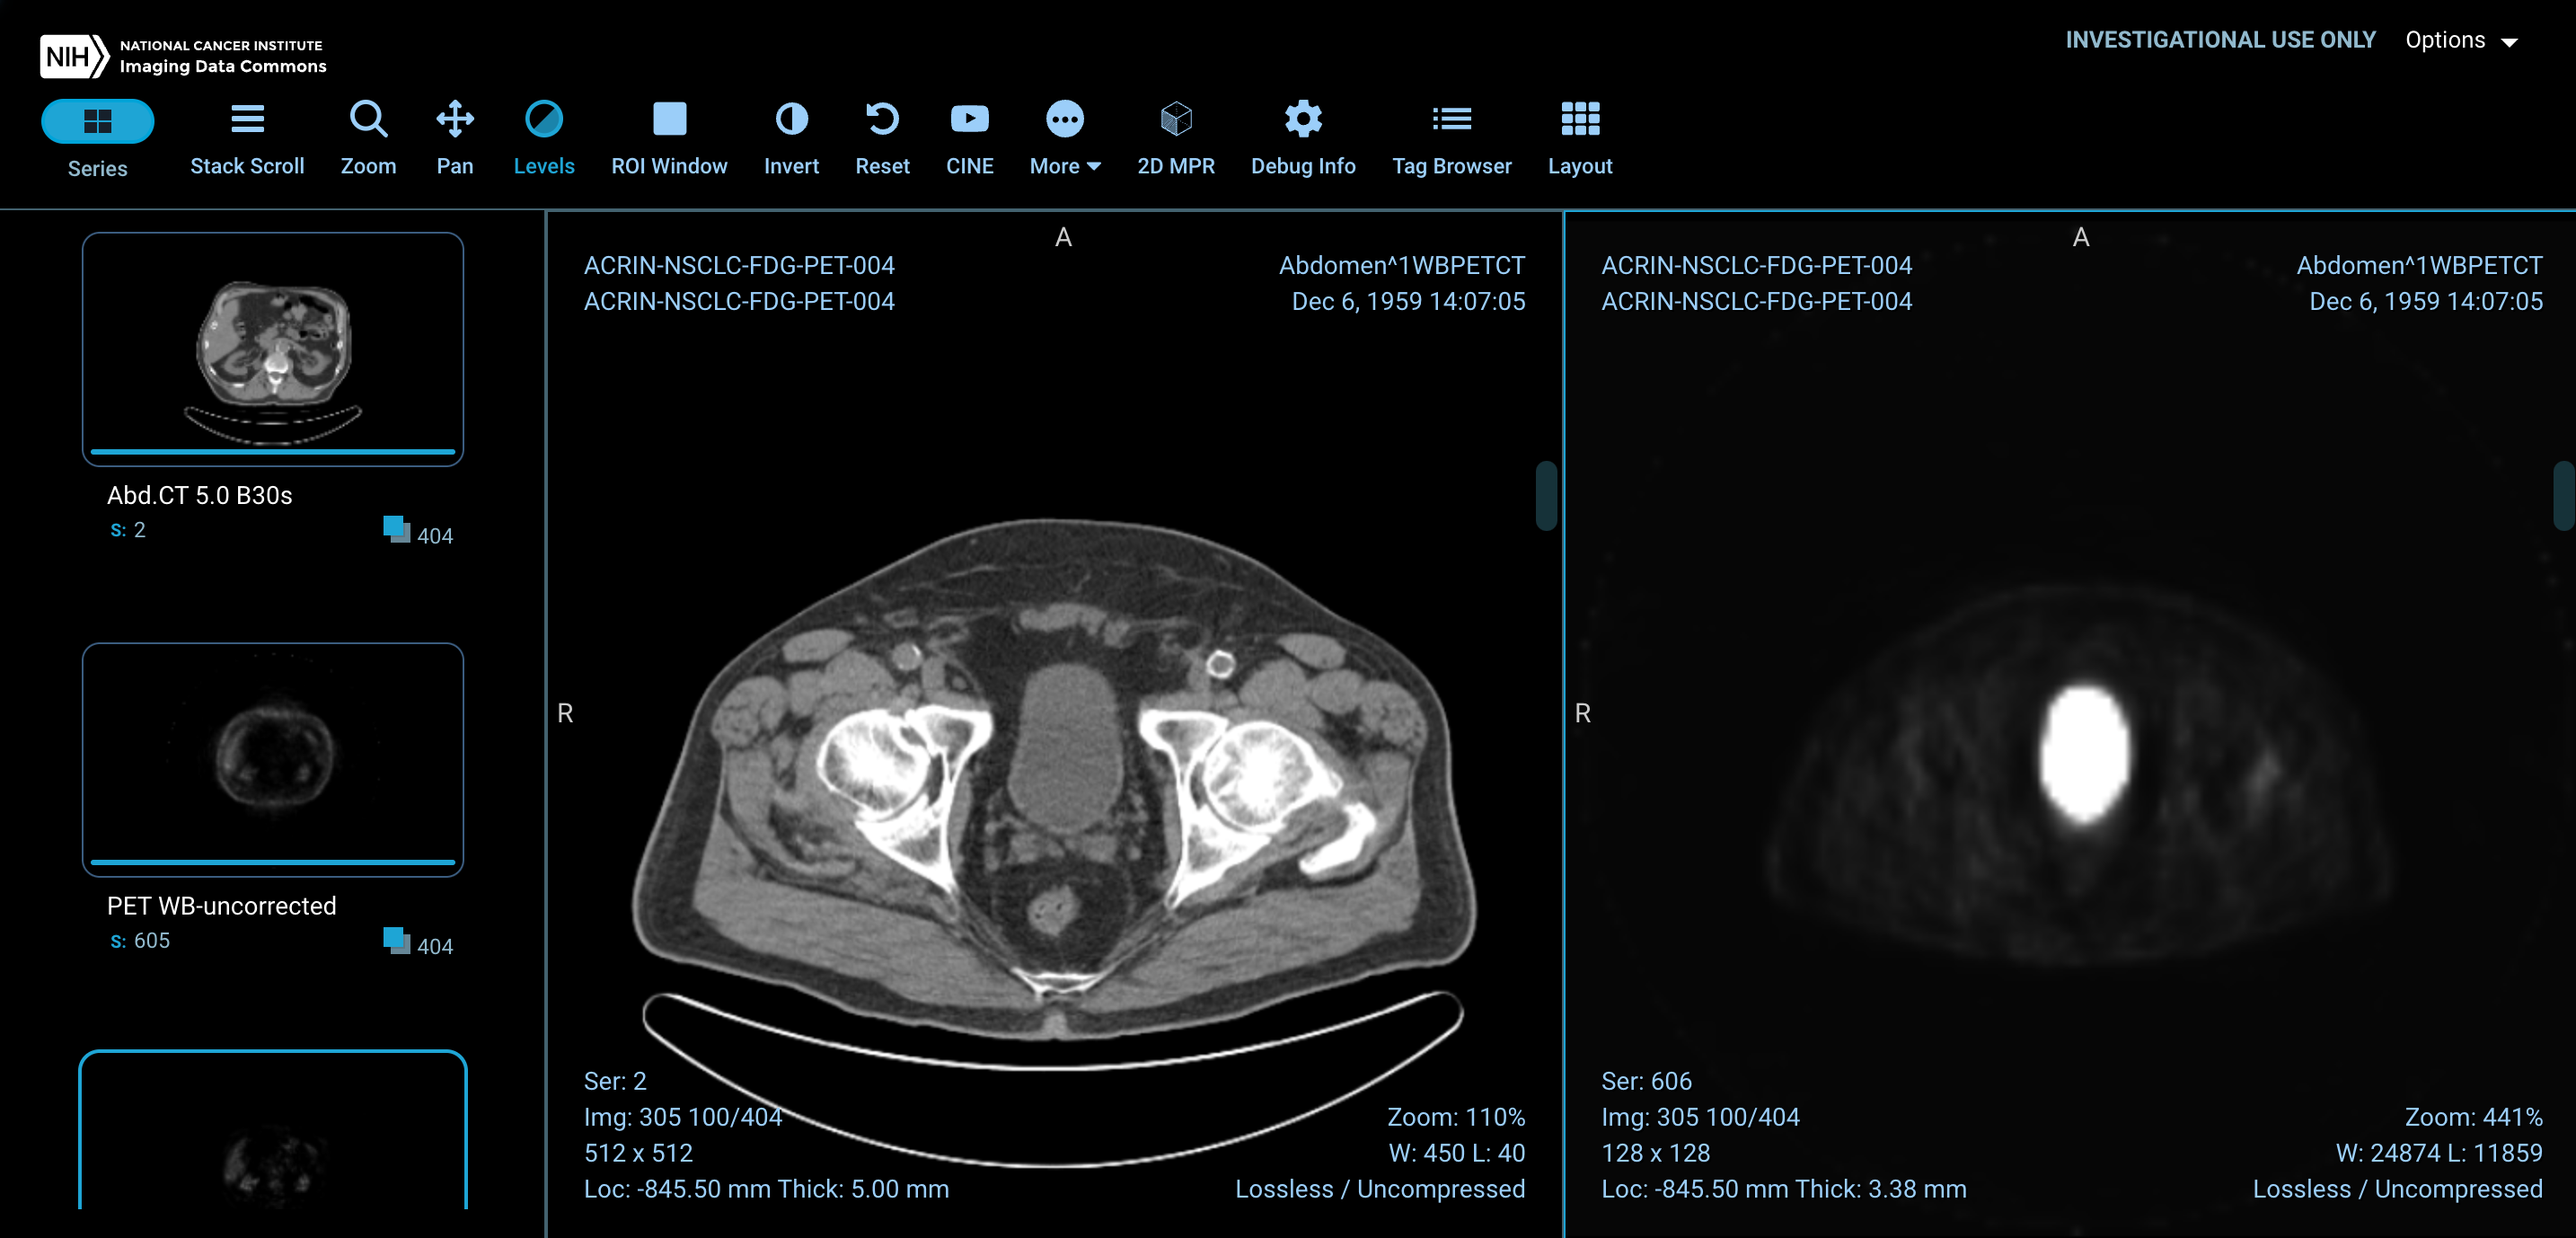

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [8]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [9]:
# Question 1): What is MPR?
#

In [10]:
# TODO: YOUR ANSWER

MPR stands for Multiplanar Reformation and it is the process to convert an image acquired in one plane to another plane.

In [11]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
#

In [12]:
# TODO: YOUR ANSWER

MIP is Maximum Density Projection and enables detection of high-density structures.

MinIP is Minimum Density Projection and enables detection of low-density structures.

AvgIP is Average Density Projection and enables detection of structures between the high and low density ranges.

In [13]:
# Now, please navigate to the lesion in all 3 orientations.
#
# TODO: Paste a screenshot below.
#

TODO: Add screenshot

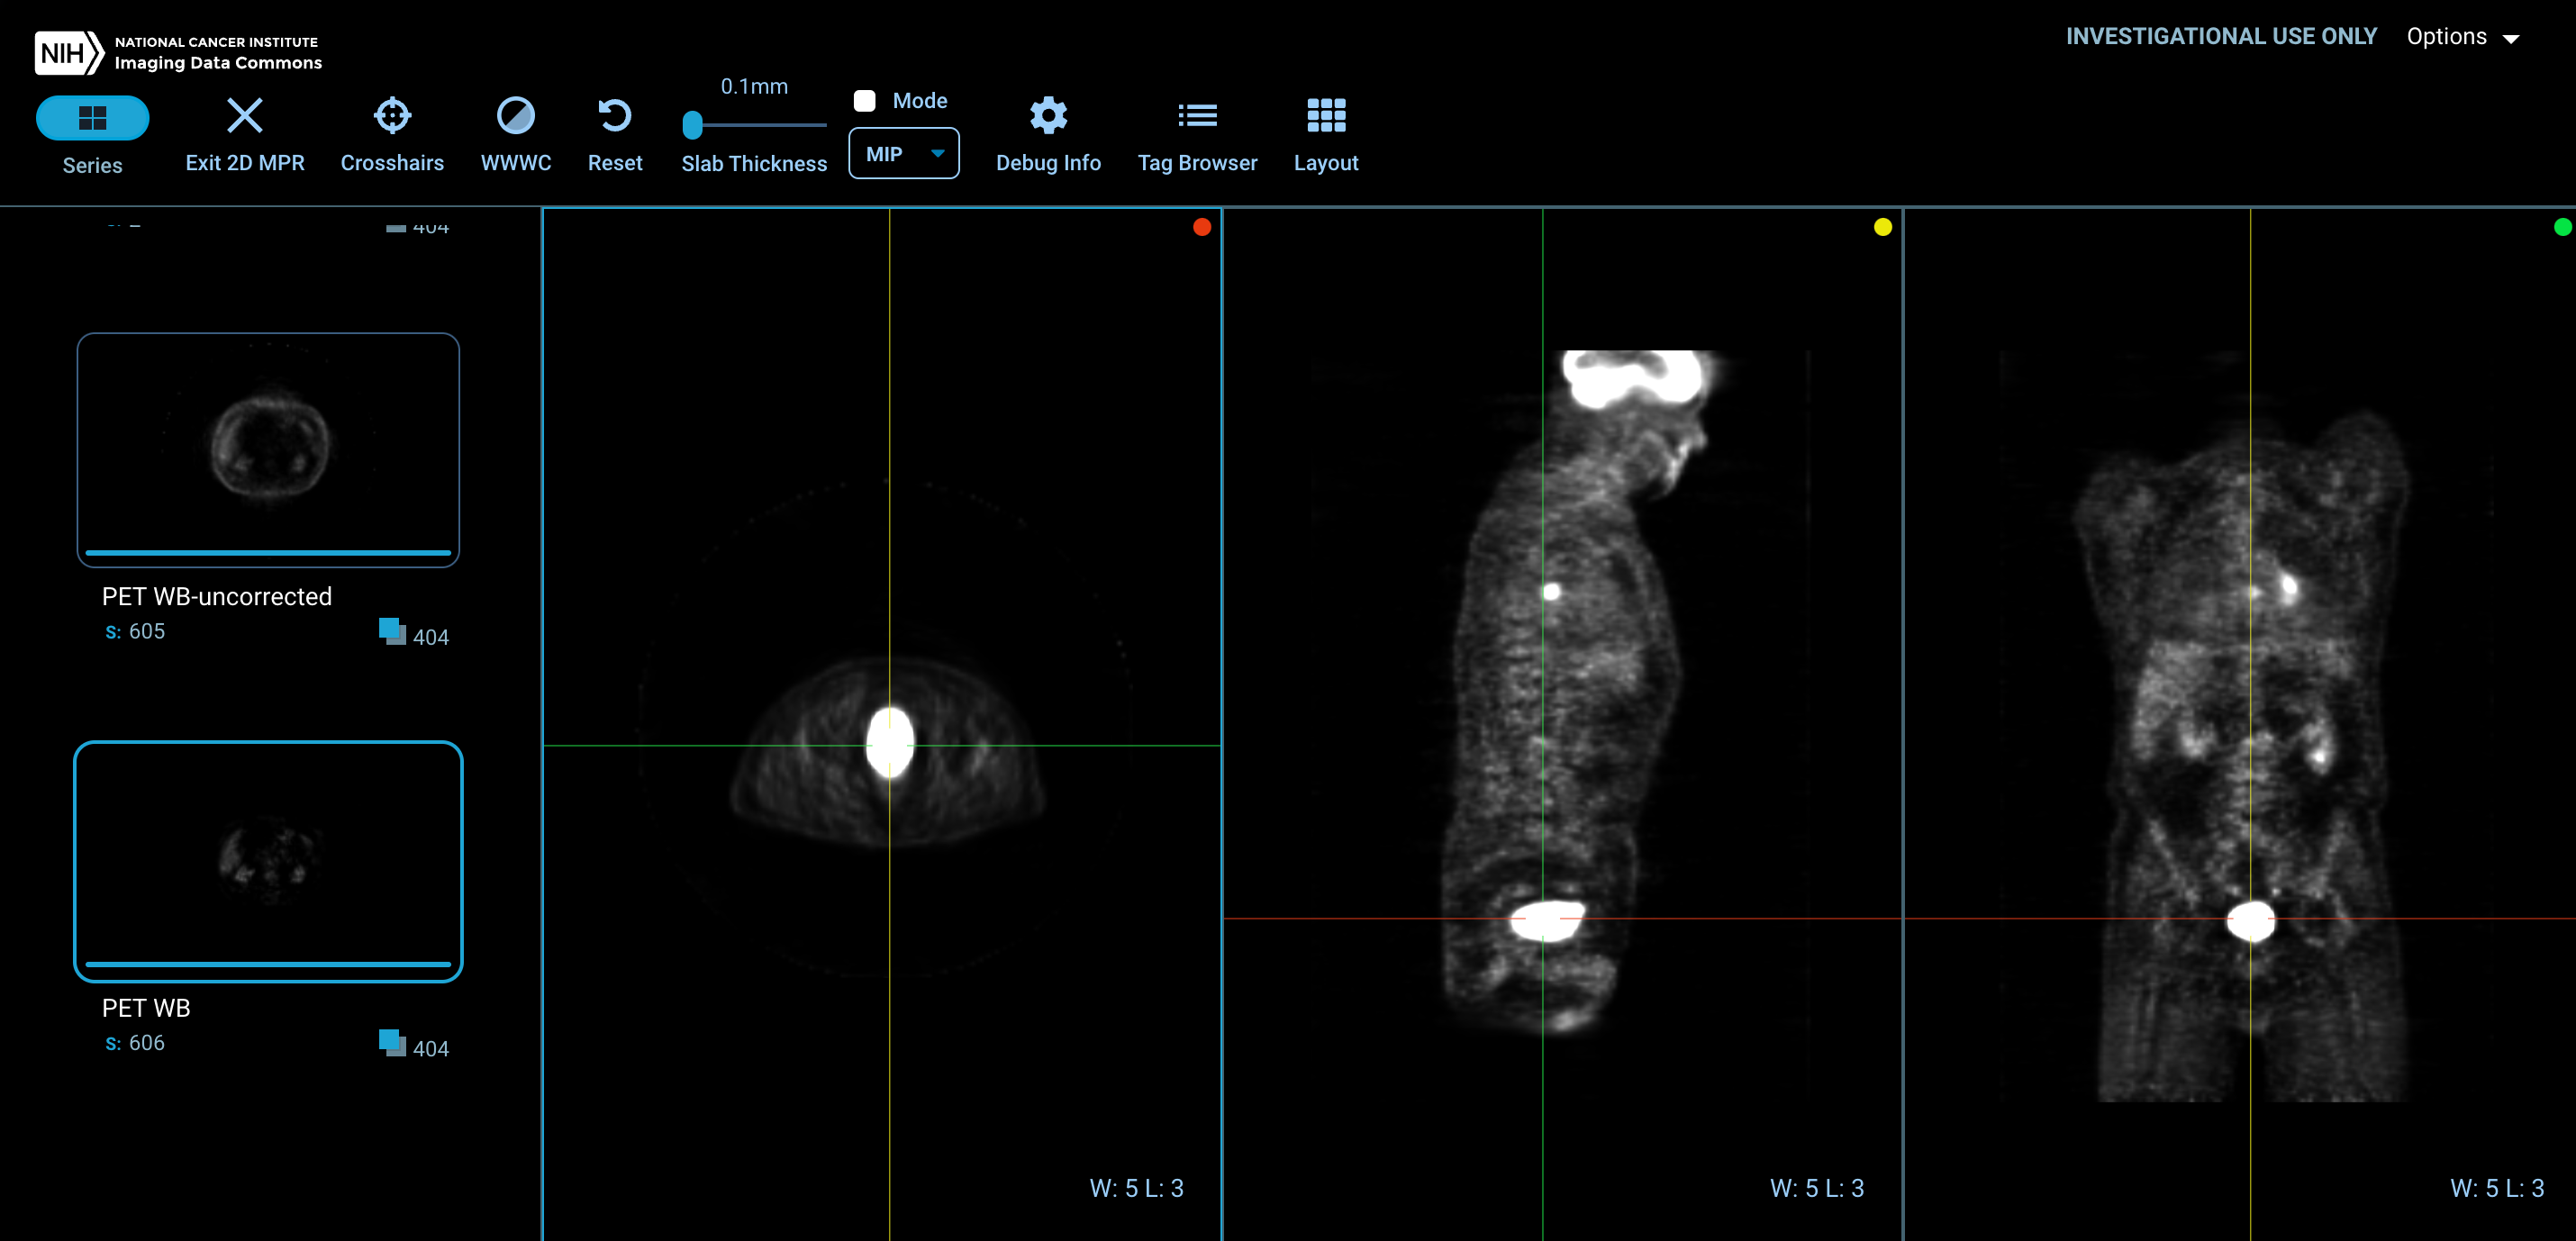

In [14]:
# Question 3): What does the Slab Thickness slider do?
#

In [15]:
# TODO: YOUR ANSWER

Slab thickness slider controls the intensity range for each of the MIP, MinIP and AvgIp. While increasing/decreasing slider's value, it was observed that some structures become visible and some invisible.

**Task 4**: Let's access the pixel data! [20 Points]

In [16]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [17]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [18]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [19]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [20]:
# TODO: YOUR ANSWER

In [21]:
# Used the below function to calculate the maximum pixel value as Math.max was giving 
# "Size limit exceeded error" due to large array size.
# https://stackoverflow.com/questions/42623071/maximum-call-stack-size-exceeded-with-math-min-and-math-max

# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
# function getMax(arr) {
#     let len = arr.length;
#     let max = -Infinity;

#     while (len--) {
#         max = arr[len] > max ? arr[len] : max;
#     }
#     return max;
# }
# getMax(pixels)

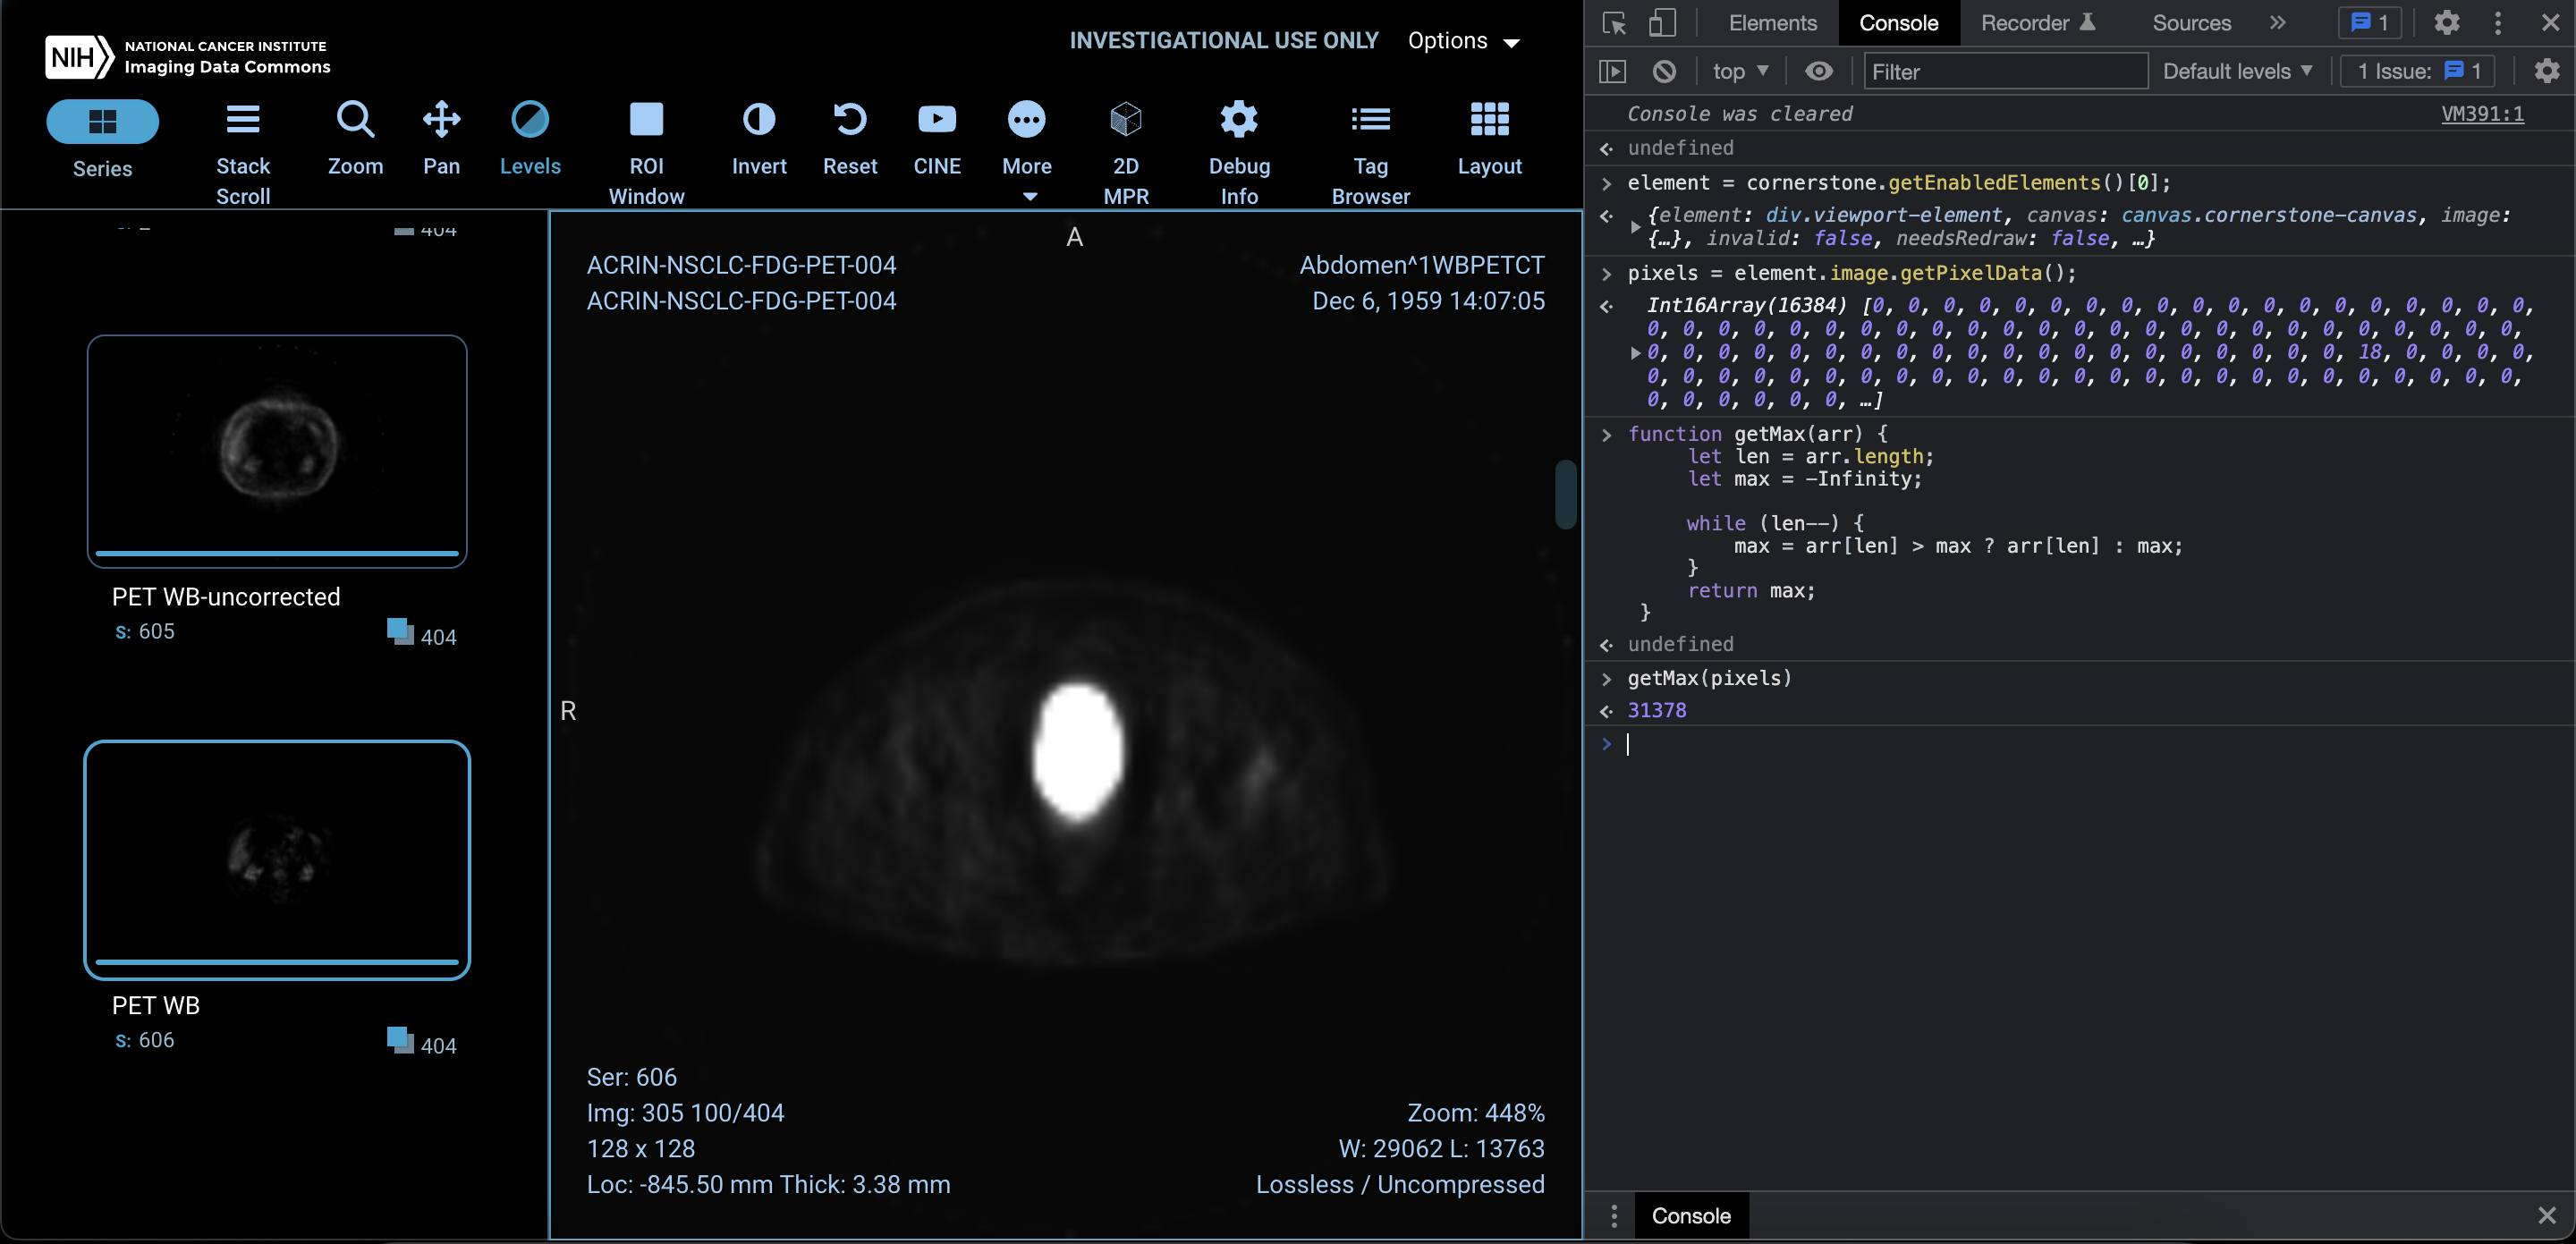

Maximum pixel value = 31378

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [22]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

Applied edge-detection filter mask.

In [23]:
# TODO: YOUR CODE GOES HERE

# The code has been referenced from the following link
# https://github.com/YangRyRay/cs480student/blob/main/07/Copy_of_CS480_Assignment_7.ipynb

# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();

# w = element.image.width;
# h = element.image.height;

# function applyEdgeDetection(pixels,w,h){

#     temp = Array.from(pixels);

#     var pixelArray = [];
#     var maskPixels = new Array(h);

#     for (var i=0; i < maskPixels.length; i++){
#         maskPixels[i]=new Array(w);
#         maskPixels[i].fill(0)
#     }

#     while(temp.length){
#         pixelArray.push(temp.splice(0,w));
#     }

#     for (var i = 1; i < h-1; i++) {
#     for (var j = 1; j < w-1; j++) {
#         var x = 0;
#         var y = 0;

#         var topLeft = pixelArray[i-1][j-1];
#         var midLeft = pixelArray[i][j-1];
#         var bottomLeft = pixelArray[i+1][j-1];

#         var topMid = pixelArray[i-1][j];
#         var midMid = pixelArray[i][j];
#         var bottomMid = pixelArray[i+1][j];

#         var topRight = pixelArray[i-1][j+1];
#         var midRight = pixelArray[i][j+1];
#         var bottomRight = pixelArray[i+1][j+1];

#         x = topLeft + midLeft*2 + bottomLeft - topRight - midRight*2 - bottomRight;
#         y = topLeft + topMid*2 + topRight - bottomLeft - bottomMid*2 - bottomRight;

#         maskPixels[i][j]=Math.abs(x)+Math.abs(y);    
#     }
#     }
#     maskPixels = Array.prototype.concat.apply([], maskPixels);

#     return maskPixels
# };

# mask = applyEdgeDetection(pixels,w,h);
# pixels.set(mask);

In [24]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT

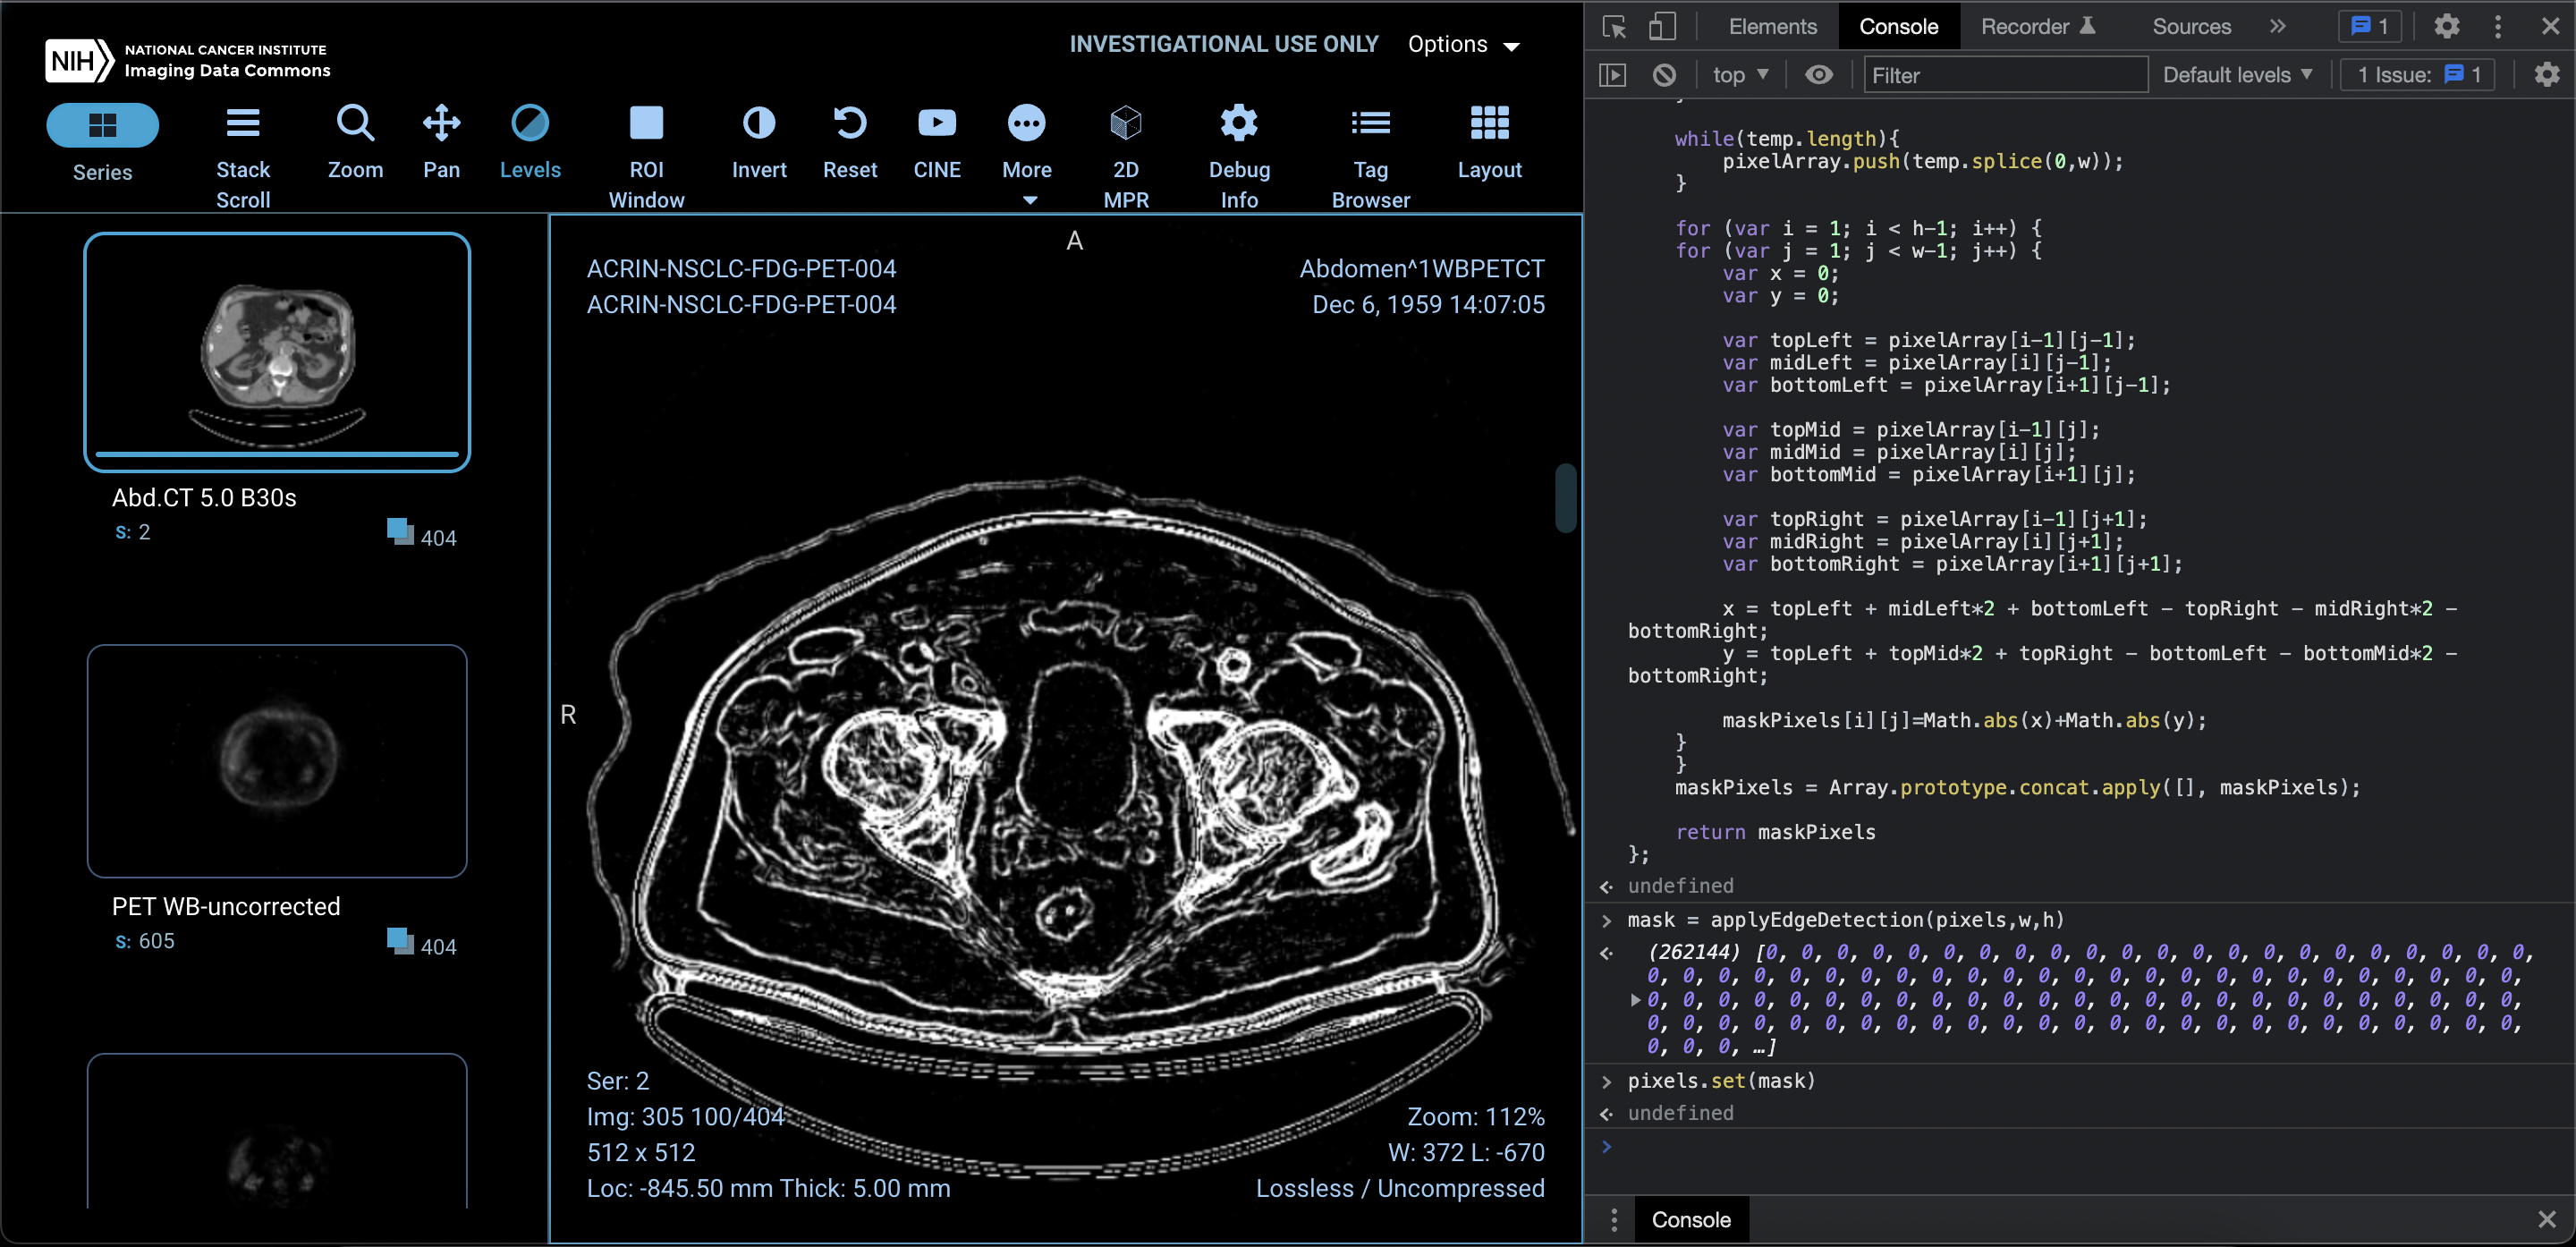

In [25]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [26]:
# TODO: YOUR CODE FOR REDRAW GOES HERE

In [27]:
# The code has been referenced from the following link
# https://fiveko.com/programming/image-edge-detection-with-javascript-no-dependencies/

# function applyMask(element){
#     function convolutionX(data, idx, w, m){
#         return (m[0]*data[idx - w - 4] + m[1]*data[idx - 4] + m[2]*data[idx + w - 4]
#             -m[0]*data[idx - w + 4] - m[1]*data[idx + 4] - m[2]*data[idx + 4 + 4]);
#         };
    
#     function convolutionY(data, idx, w, m){
#         return (m[0]*data[idx - w - 4] + m[1]*data[idx - w] + m[2]*data[idx - w + 4]
#             -(m[0]*data[idx + w - 4] + m[1]*data[idx + w] + m[2]*data[idx + w + 4]));
#         };
    
#     var context = element.canvas.getContext('2d');
#     var pixels = context.getImageData(0, 0, element.canvas.width,element.canvas.height);
    
#     var data = pixels.data;
#     var w = pixels.width*4;
#     var h = data.length - w - 4;
#     var buffer = new data.constructor(new ArrayBuffer(data.length));
      
#     for (var i = w + 4; i < h; i+=4){
#         var dx = convolutionX(data, i, w, [1,2,1]);
#         var dy = convolutionY(data, i, w, [1,2,1]);
#         buffer[i] = buffer[i + 1] = buffer[i + 2] = Math.sqrt(dx*dx + dy*dy);
#         buffer[i + 3] = 255;
#     }
    
#     pixels.data.set(buffer);
#     context.putImageData(pixels, 0, 0);
# };

# var element = cornerstone.getEnabledElements()[0];
# applyMask(element);

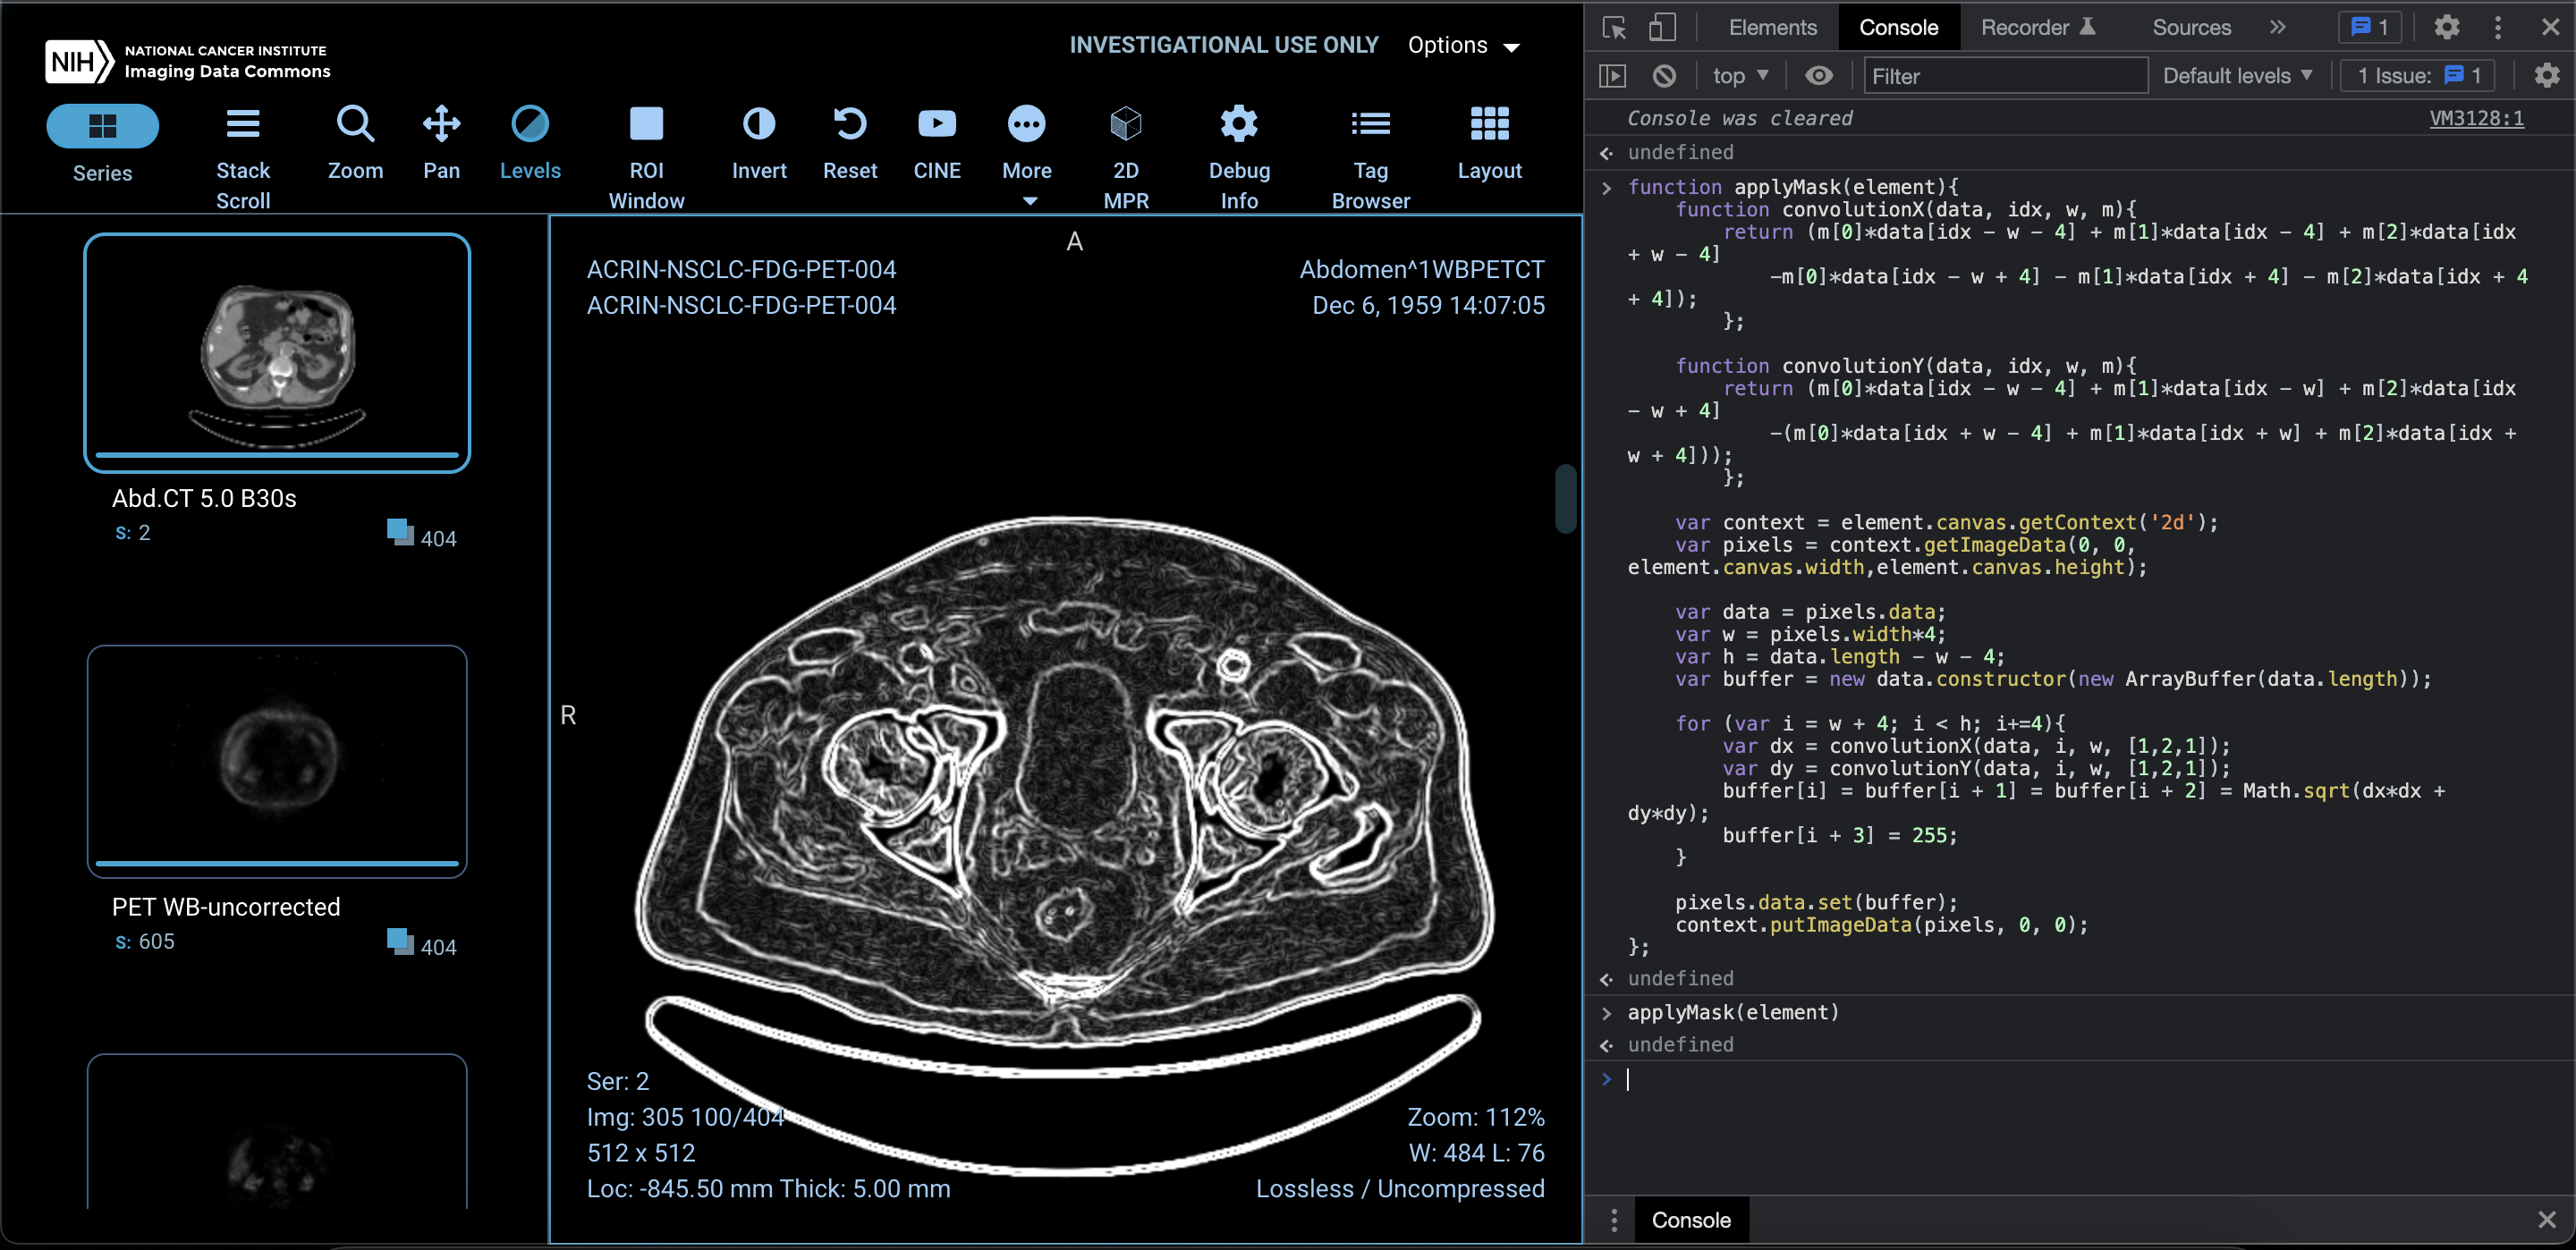

In [28]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#

# References


* Student collaborated with: Akshay Deshmukh
* https://radiopaedia.org/articles/multiplanar-reformation-mpr?lang=us
* https://radiopaedia.org/articles/minimum-intensity-projection-minip?lang=us
* https://docs.medicalharbour.com/us/athena-dicom-viewer-en/6-tools/687-average-intensity-projection-aip/#open
* https://fiveko.com/programming/image-edge-detection-with-javascript-no-dependencies/
* https://learn.canceridc.dev/portal/visualization?q=MPR
* https://stackoverflow.com/questions/42623071/maximum-call-stack-size-exceeded-with-math-min-and-math-max
* https://github.com/YangRyRay/cs480student/blob/main/07/Copy_of_CS480_Assignment_7.ipynb


